# 회귀(Regression)

: 예측 모델링 기법 중 하나로 독립 변수와 종속 변수 간의 관계를 모델링하여 연속적인 값을 예측하는 것을 목표로 한다.

- 선형회귀 : 가장 기본적인 회귀 방법, 선형관계를 모델링(가장 기본적인 회귀 방법)
- 다중회귀 : 두 개 이상의 독립변수 사용
- 다항회귀 : 독립변수와 종속변수 간의 비선형관계를 모델링
- 릿지회귀 : 과적합을 방지해주는 회귀(L2 정규화)
- 라쏘회귀 : L1 정규화
- 로지스틱회귀 : 종속변수가 범주형인 경우(분류 문제에 쓰인다.) ⭐️⭐️⭐️
- 엘라스틱 넷 회귀 : L1, L2 정규화

In [224]:
from sklearn.datasets import load_breast_cancer

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.feature_extraction import DictVectorizer

from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge, ElasticNet, LassoCV, RidgeCV, ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import metrics

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings(action='ignore')

plt.rcParams['axes.unicode_minus']=False
plt.rc('font', family='AppleGothic')

In [225]:
data = pd.read_csv('HousePrices.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [226]:
data.shape

(1460, 81)

In [227]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [228]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<Axes: xlabel='SalePrice', ylabel='Density'>

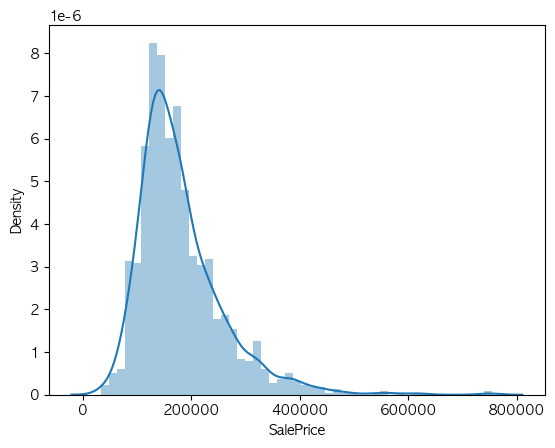

In [229]:
sns.distplot(data['SalePrice'])

In [230]:
for categ in ['MSSubClass', 'OverallQual', 'OverallCond']:
    data[categ]=data[categ].astype(str)

In [231]:
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

X.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [232]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [233]:
NaNinfo = X_train.isnull().sum()
NaNinfo = NaNinfo.sort_values(ascending=False)
NaNinfo = NaNinfo[NaNinfo > 0]
NaNinfo

PoolQC          974
MiscFeature     939
Alley           915
Fence           787
MasVnrType      560
FireplaceQu     467
LotFrontage     183
GarageCond       53
GarageType       53
GarageYrBlt      53
GarageQual       53
GarageFinish     53
BsmtFinType2     25
BsmtFinType1     25
BsmtExposure     25
BsmtCond         25
BsmtQual         25
MasVnrArea        2
Electrical        1
dtype: int64

In [234]:
for col in NaNinfo.index:
    print(f'{col} : {data[col].unique().tolist()[:10]}')

PoolQC : [nan, 'Ex', 'Fa', 'Gd']
MiscFeature : [nan, 'Shed', 'Gar2', 'Othr', 'TenC']
Alley : [nan, 'Grvl', 'Pave']
Fence : [nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw']
MasVnrType : ['BrkFace', nan, 'Stone', 'BrkCmn']
FireplaceQu : [nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po']
LotFrontage : [65.0, 80.0, 68.0, 60.0, 84.0, 85.0, 75.0, nan, 51.0, 50.0]
GarageCond : ['TA', 'Fa', nan, 'Gd', 'Po', 'Ex']
GarageType : ['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types']
GarageYrBlt : [2003.0, 1976.0, 2001.0, 1998.0, 2000.0, 1993.0, 2004.0, 1973.0, 1931.0, 1939.0]
GarageQual : ['TA', 'Fa', 'Gd', nan, 'Ex', 'Po']
GarageFinish : ['RFn', 'Unf', 'Fin', nan]
BsmtFinType2 : ['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ']
BsmtFinType1 : ['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ']
BsmtExposure : ['No', 'Gd', 'Mn', 'Av', nan]
BsmtCond : ['TA', 'Gd', nan, 'Fa', 'Po']
BsmtQual : ['Gd', 'TA', 'Ex', nan, 'Fa']
MasVnrArea : [196.0, 0.0, 162.0, 350.0, 186.0, 240.0, 286.0, 306.0, 212.0, 180.0]
Electrical :

In [235]:
for feature in ['LotFrontage', 'LotArea', 'MasVnrArea',
                'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
                '1stFlrSF', '2ndFlrSF', 'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath', 'HalfBath',
                'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
                'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
                'ScreenPorch', 'PoolArea','MiscVal']:
    X_train[feature] = X_train[feature].fillna(X_train[feature].mean())
    X_test[feature] = X_test[feature].fillna(X_test[feature].mean())

In [236]:
for feature in ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
                'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual',
                'BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtFinType1',
                'Electrical', 'MSZoning', 'Functional', 'Utilities', 'KitchenQual',
                'SaleType', 'Exterior1st', 'Exterior2nd','MasVnrType']:
    X_train[feature] = X_train[feature].fillna('NaN')
    X_test[feature] = X_test[feature].fillna('NaN')

In [237]:
category = list(X_train.select_dtypes(include=[object]))
print(category)

['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


### One-Hot encoding 'Ex', 'Fa', 'Gd'
- 1 0 0, 0 1 0, 0 0 1, 0 0 0
    - Ex : 1 0 0
    - Fa : 0 1 0
    - Gd : 0 0 1
    - nan : 0 0 0

### Label encoding 정렬 기준으로 숫자를 할당 'Ex', 'Fa', 'Gd'
- 들어온 순서대로 지정
    - Ex : 1
    - Fa : 2
    - Gd : 3
    - nan : 4

In [238]:
vec = DictVectorizer()
vec.fit(X_train[category].to_dict('records')) # 범주형 데이터의 실수화

DictVectorizer()

In [239]:
scaler = StandardScaler()
scaler.fit(X_train.drop(category, axis=1)) # 실수화 처리 후 정규화처리를 해주었다.

StandardScaler()

In [240]:
X_category = vec.transform(X_train[category].to_dict('records'))
X_train_category = pd.DataFrame(X_category.toarray(), columns=vec.feature_names_)
X_train_category.head()

X_category = vec.transform(X_test[category].to_dict('records'))
X_test_category = pd.DataFrame(X_category.toarray(), columns=vec.feature_names_)
X_test_category.head()

,Alley=Grvl,Alley=NaN,Alley=Pave,BldgType=1Fam,BldgType=2fmCon,BldgType=Duplex,BldgType=Twnhs,BldgType=TwnhsE,BsmtCond=Fa,BsmtCond=Gd,...,SaleType=ConLD,SaleType=ConLI,SaleType=ConLw,SaleType=New,SaleType=Oth,SaleType=WD,Street=Grvl,Street=Pave,Utilities=AllPub,Utilities=NoSeWa
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [241]:
X_train_without_category = X_train.drop(category, axis=1)
X_scale = scaler.transform(X_train_without_category)
X_train_scale = pd.DataFrame(X_scale, columns=X_train_without_category.columns)
#X_train_scale.head()

X_test_without_category = X_test.drop(category, axis=1)
X_scale = scaler.transform(X_test_without_category)
X_test_scale = pd.DataFrame(X_scale, columns=X_test_without_category.columns)


In [242]:
X_train_final = pd.concat([X_train_scale, X_train_category], axis=1)
X_train_final.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType=ConLD,SaleType=ConLI,SaleType=ConLw,SaleType=New,SaleType=Oth,SaleType=WD,Street=Grvl,Street=Pave,Utilities=AllPub,Utilities=NoSeWa
0,-0.263473,0.422314,-0.168264,-0.260504,-1.052964,0.278133,0.683594,-0.274727,-0.891657,-0.275447,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,-0.268152,-0.012357,-0.202722,1.170987,1.067550,-0.614444,-0.527943,-0.274727,0.777405,0.135759,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,1.345941,0.118045,-0.177961,1.105920,0.971163,0.690091,-0.976015,-0.274727,2.358621,1.244227,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,-0.565239,0.378847,-0.039349,-0.195436,-0.956577,0.346793,0.842377,-0.274727,-0.747501,0.030723,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,-0.389794,0.291913,-0.063504,0.097369,-0.474642,-0.614444,1.353528,0.536188,-0.842104,0.736924,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [243]:
X_category = vec.transform(X_test[category].to_dict('records'))
X_test_category = pd.DataFrame(X_category.toarray(), columns=vec.feature_names_)

X_test_without_category = X_test.drop(category, axis=1)
X_scale = scaler.transform(X_test_without_category)
X_test_scale = pd.DataFrame(X_scale, columns=X_test_without_category.columns)

In [244]:
X_test_final = pd.concat([X_test_scale, X_test_category], axis=1)
X_test_final.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType=ConLD,SaleType=ConLI,SaleType=ConLw,SaleType=New,SaleType=Oth,SaleType=WD,Street=Grvl,Street=Pave,Utilities=AllPub,Utilities=NoSeWa
0,0.384503,-0.012357,-0.201683,-0.260504,0.874776,-0.614444,0.466083,-0.274727,-0.389362,-0.000564,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,0.882766,1.204722,0.130950,0.748047,0.489228,1.456792,1.268699,-0.274727,-0.310527,0.902300,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,-0.736005,-0.620896,-0.154411,-1.431724,-1.679479,-0.614444,-0.976015,-0.274727,0.989134,-0.114540,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,-0.481025,-0.881699,-0.497260,-0.781046,-1.679479,-0.614444,-0.108146,-0.274727,0.081399,-0.123479,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,0.721357,0.813518,0.186533,1.170987,1.115743,-0.213929,1.246948,-0.274727,0.065632,1.253166,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [245]:
X_train, y_train = X_train_final.values, y_train.values
X_test, y_test = X_test_final.values, y_test.values

### 'Linear Regression' vs 'Lasso' vs 'Ridge'

In [246]:
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)
pd.DataFrame(model_LR.coef_, index=X_test_final.columns, columns=['Linear regression 계수'])

,Linear regression 계수
Id,2.195418e+02
LotFrontage,5.125276e+02
LotArea,8.141273e+03
YearBuilt,1.144120e+04
YearRemodAdd,3.036894e+03
...,...
SaleType=WD,-3.554591e+13
Street=Grvl,-1.417271e+13
Street=Pave,-1.417271e+13
Utilities=AllPub,1.158930e+12


In [247]:
model_Lasso1 = Lasso(alpha=0.0001, random_state=42) # 규제강도가 낮다.
model_Lasso2 = Lasso(alpha=100, random_state=42) # 규제강도가 높다
model_Ridge1 = Ridge(alpha=0.0001, random_state=42) # 규제강도가 낮다.
model_Ridge2 = Ridge(alpha=100, random_state=42) # 규제강도가 높다.

model_Lasso1.fit(X_train, y_train)
model_Lasso2.fit(X_train, y_train)
model_Ridge1.fit(X_train, y_train)
model_Ridge2.fit(X_train, y_train)

Ridge(alpha=100, random_state=42)

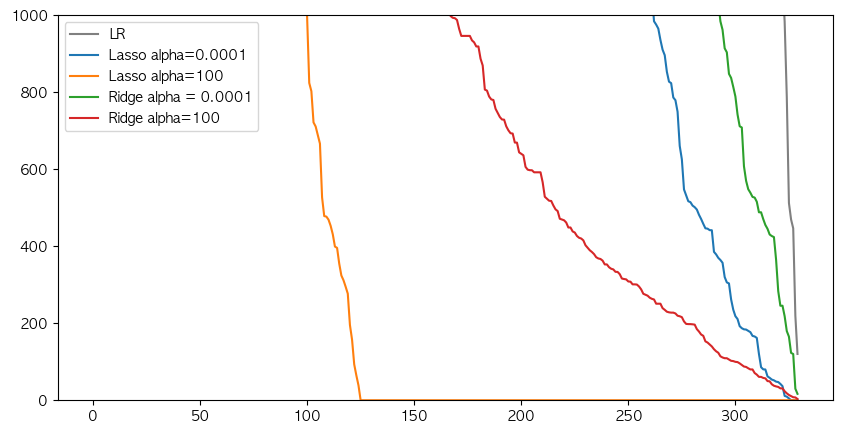

In [248]:
plt.figure(figsize=(10,5))
plt.plot(sorted(np.abs(model_LR.coef_))[::-1], label='LR', c='gray')
plt.plot(sorted(np.abs(model_Lasso1.coef_))[::-1], label='Lasso alpha=0.0001')
plt.plot(sorted(np.abs(model_Lasso2.coef_))[::-1], label='Lasso alpha=100')
plt.plot(sorted(np.abs(model_Ridge1.coef_))[::-1], label='Ridge alpha = 0.0001')
plt.plot(sorted(np.abs(model_Ridge2.coef_))[::-1], label='Ridge alpha=100')

plt.legend()
plt.ylim((-0.1, 1000))
plt.show()

# x값이 커질수록 작은 특성응ㄹ 나타낸다. 0일 때, 가장 큰 계수를 가지는 특성(특성의 순위)
# y값은 계수 절대값(계수의 크기)

In [249]:
# 라쏘 모델은 일부 특성의 계수를 0으로 만들기 때문에 중요한 특성의 수가 다른 모델에 비해 적을 수 있다.
# 릿지 모델은 모든 계수를 작게 만들지만, 0으로는 만들지 않기 때문에 라쏘 모델에 비해 더 많은 특성을 중요하다고 나타낼 수 있다.

## KFold

In [250]:
cv = 5 # 교차검증에서 사용할 폴드의 수
max_iter = 5000 # 최대 반복 횟수 

n_trails = 50 # 하이퍼파라미터 튜닝 시도 수

def myrange(start, end, step):
    r = start
    while(r<end):
        yield r
        r += step

alpha_list = list(reversed([round(i, 2) for i in myrange(0.01, 10, 0.1)]))
print(alpha_list)

[9.91, 9.81, 9.71, 9.61, 9.51, 9.41, 9.31, 9.21, 9.11, 9.01, 8.91, 8.81, 8.71, 8.61, 8.51, 8.41, 8.31, 8.21, 8.11, 8.01, 7.91, 7.81, 7.71, 7.61, 7.51, 7.41, 7.31, 7.21, 7.11, 7.01, 6.91, 6.81, 6.71, 6.61, 6.51, 6.41, 6.31, 6.21, 6.11, 6.01, 5.91, 5.81, 5.71, 5.61, 5.51, 5.41, 5.31, 5.21, 5.11, 5.01, 4.91, 4.81, 4.71, 4.61, 4.51, 4.41, 4.31, 4.21, 4.11, 4.01, 3.91, 3.81, 3.71, 3.61, 3.51, 3.41, 3.31, 3.21, 3.11, 3.01, 2.91, 2.81, 2.71, 2.61, 2.51, 2.41, 2.31, 2.21, 2.11, 2.01, 1.91, 1.81, 1.71, 1.61, 1.51, 1.41, 1.31, 1.21, 1.11, 1.01, 0.91, 0.81, 0.71, 0.61, 0.51, 0.41, 0.31, 0.21, 0.11, 0.01]


In [251]:
model_Lasso = LassoCV(alphas=alpha_list, cv=cv, n_jobs=-1, random_state=42, max_iter=max_iter) # LassoCV를 통해 Lasso 회귀 모델 교차 검증
model_Lasso.fit(X_train, y_train)

LassoCV(alphas=[9.91, 9.81, 9.71, 9.61, 9.51, 9.41, 9.31, 9.21, 9.11, 9.01,
                8.91, 8.81, 8.71, 8.61, 8.51, 8.41, 8.31, 8.21, 8.11, 8.01,
                7.91, 7.81, 7.71, 7.61, 7.51, 7.41, 7.31, 7.21, 7.11, 7.01, ...],
        cv=5, max_iter=5000, n_jobs=-1, random_state=42)

In [252]:
model_Lasso.alpha_

9.91

In [253]:
pred_train_LR = model_LR.predict(X_train)
pred_test_LR = model_LR.predict(X_test)
pred_train_Lasso = model_Lasso.predict(X_train)
pred_test_Lasso = model_Lasso.predict(X_test)

In [254]:
train_rmse_LR = np.sqrt(mean_squared_error(y_train, pred_train_LR))
train_mae_LR = mean_absolute_error(y_train, pred_train_LR)
train_r2_LR = r2_score(y_train, pred_train_LR)

test_rmse_LR = np.sqrt(mean_squared_error(y_test, pred_test_LR))
test_mae_LR = mean_absolute_error(y_test, pred_test_LR)
test_r2_LR = r2_score(y_test, pred_test_LR)

In [255]:
train_rmse_Lasso = np.sqrt(mean_squared_error(y_train, pred_train_Lasso))
train_mae_Lasso = mean_absolute_error(y_train, pred_train_Lasso)
train_r2_Lasso = r2_score(y_train, pred_train_Lasso)

test_rmse_Lasso = np.sqrt(mean_squared_error(y_test, pred_test_Lasso))
test_mae_Lasso = mean_absolute_error(y_test, pred_test_Lasso)
test_r2_Lasso = r2_score(y_test, pred_test_Lasso)

In [256]:
result = pd.DataFrame(index=['rmse', 'mae', 'r2'], columns=['LR train', 'LR test', 'Lasso train', 'Lasso test'])

In [257]:
result.loc['rmse', 'LR train'] = train_rmse_LR
result.loc['mae', 'LR train'] = train_mae_LR
result.loc['r2', 'LR train'] = train_r2_LR

result.loc['rmse', 'LR test'] = test_rmse_LR
result.loc['mae', 'LR test'] = test_mae_LR
result.loc['r2', 'LR test'] = test_r2_LR

In [258]:
result.loc['rmse', 'LR train'] = train_rmse_Lasso
result.loc['mae', 'LR train'] = train_mae_Lasso
result.loc['r2', 'LR train'] = train_r2_Lasso

result.loc['rmse', 'LR test'] = test_rmse_Lasso
result.loc['mae', 'LR test'] = test_mae_Lasso
result.loc['r2', 'LR test'] = test_r2_Lasso

In [259]:
result # Lasso test alpha 최적화 값을 사용 -> 성능이 좋아짐

,LR train,LR test,Lasso train,Lasso test
rmse,18373.81376,27363.66889,NaN,NaN
mae,11986.952982,17124.437081,NaN,NaN
r2,0.941762,0.898007,NaN,NaN


In [260]:
# Lasso, Ridge, ElasticNet
models = {}

cv = 5
n_trials = 20
max_iter = 5000

alpha_list = list(reversed([round(i, 2) for i in myrange(0.01, 10, 0.1)]))
l1_list = list(reversed([round(i, 2) for i in myrange(0, 1, 0.1)]))

In [261]:
model = LassoCV(alphas=alpha_list, cv=cv, n_jobs=-1, random_state=42, max_iter=max_iter)
model.fit(X_train, y_train)
models['Lasso'] = Lasso(alpha=model.alpha_, max_iter=max_iter)

In [262]:
model = RidgeCV(alphas=alpha_list, cv=cv)
model.fit(X_train, y_train)
models['Ridge'] = Ridge(alpha=model.alpha_)

In [263]:
# ElasticNet은 Lasso와 Ridge의 하이브리드 모델 (l1_ratio=Lasso, Ridge 몇 퍼센트씩?)
model = ElasticNetCV(alphas = alpha_list, l1_ratio=l1_list, cv = cv, random_state=42, n_jobs=-1, max_iter=max_iter)
model.fit(X_train, y_train)
models['ElasticNet'] = ElasticNet(alpha=model.alpha_, l1_ratio=model.l1_ratio_, max_iter=max_iter)

In [264]:
for name in models.keys():
    print(models[name])

Lasso(alpha=9.91, max_iter=5000)
Ridge(alpha=9.91)
ElasticNet(alpha=0.11, l1_ratio=0.8, max_iter=5000)


In [265]:
kf = KFold(cv, shuffle=True, random_state=42)
kf

KFold(n_splits=5, random_state=42, shuffle=True)

In [266]:
score = {}

for name in models.keys():
    if name not in score:
        score[name] = []

    reg = models[name] # 모델 객체 이름
    for i_train, i_valid in kf.split(X_train): # 학습세트와 검증세트로 나눠준다.
        reg.fit(X_train[i_train], y_train[i_train])
        y_pred = reg.predict(X_train[i_valid])
        RMSE = np.sqrt(mean_squared_error(y_train[i_valid], y_pred))
        score[name].append(RMSE)

In [267]:
score

{'Lasso': [35478.64814017786,
  53146.848685814446,
  38372.48999751445,
  27838.82532121278,
  52732.5036442996],
 'Ridge': [22795.933200700983,
  44549.31212110353,
  37380.811614129874,
  32345.99087701056,
  32819.20394878436],
 'ElasticNet': [22178.28859495848,
  44636.133661468935,
  37679.52009040865,
  32299.581842551557,
  32480.125601568274]}

In [268]:
results = pd.DataFrame(score)
results

,Lasso,Ridge,ElasticNet
0,35478.648140,22795.933201,22178.288595
1,53146.848686,44549.312121,44636.133661
2,38372.489998,37380.811614,37679.520090
3,27838.825321,32345.990877,32299.581843
4,52732.503644,32819.203949,32480.125602


,mean,std
Lasso,41513.863158,11118.486319
Ridge,33978.250352,7943.183343
ElasticNet,33854.729958,8238.855975


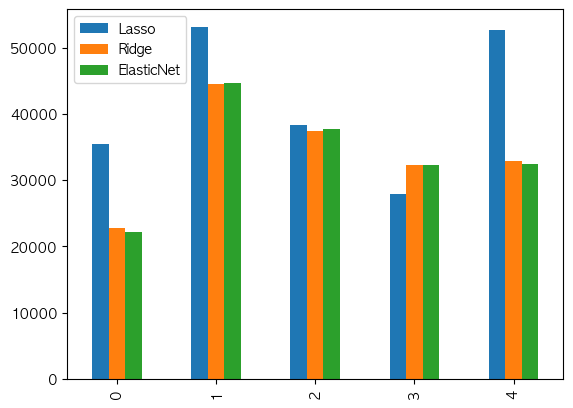

In [269]:
ax = results.plot.bar()
pd.concat([results.mean(), results.std()], axis=1, keys=['mean', 'std'])

In [270]:
model = models['ElasticNet'].fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

In [271]:
rmse_train = np.sqrt(mean_squared_error(y_train, pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))
print(f'train rmse : {rmse_train:.4f}')
print(f'test rmse : {rmse_test:.4f}')                    

train rmse : 24512.7355
test rmse : 34376.6355


In [275]:
r2_train = r2_score(y_train, pred_train)
r2_test = r2_score(y_test, pred_test)
print(f'train r2 : {r2_train:.4f}')
print(f'test r2 : {r2_test:.4f}')   

train r2 : 0.8963
test r2 : 0.8390


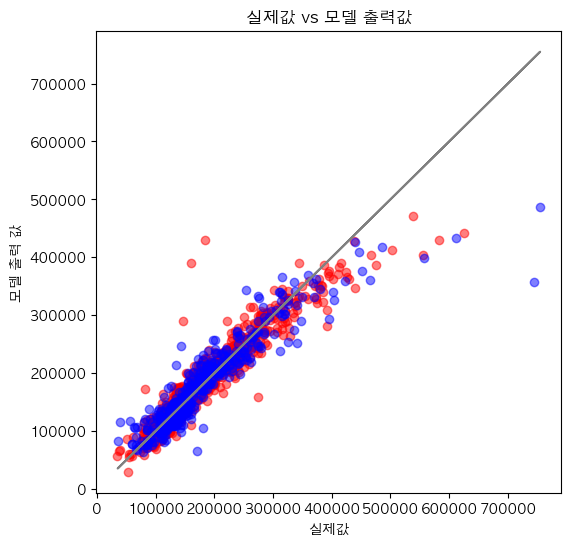

In [277]:
plt.figure(figsize=(6, 6))
plt.title('실제값 vs 모델 출력값')
plt.scatter(y_train, pred_train, c='red', alpha=0.5)
plt.scatter(y_test, pred_test, c='blue', alpha=0.5)
plt.plot(y_test, y_test, c='gray')
plt.xlabel('실제값')
plt.ylabel('모델 출력 값')
plt.show()

In [283]:
# 계수값을 기준으로 변수 중요도 파악
model = models['ElasticNet'].fit(X_train, y_train)

coef_df = pd.DataFrame(model.coef_.reshape(-1, 1), index=X_test_final.columns, columns=['coefficents'])
coef_df

,coefficents
Id,-913.433498
LotFrontage,-3500.914780
LotArea,4778.867606
YearBuilt,6444.949084
YearRemodAdd,2870.285770
...,...
SaleType=WD,-4928.271264
Street=Grvl,-3520.699654
Street=Pave,3520.699627
Utilities=AllPub,1672.043963


In [290]:
coefficents = np.abs(coef_df.coefficents)
index = np.argsort(coefficents)[::-1] # 역순 슬라이싱
print(index)

Utilities=NoSeWa    290
Utilities=AllPub     66
Street=Pave         269
Street=Grvl         262
SaleType=WD         263
                   ... 
YearRemodAdd        235
YearBuilt           175
LotArea             307
LotFrontage         116
Id                  244
Name: coefficents, Length: 330, dtype: int64


In [291]:
importance = coefficents[index]
columns = [list(coef_df.index)[i] for i in index]

In [292]:
importance = importance[importance>0]

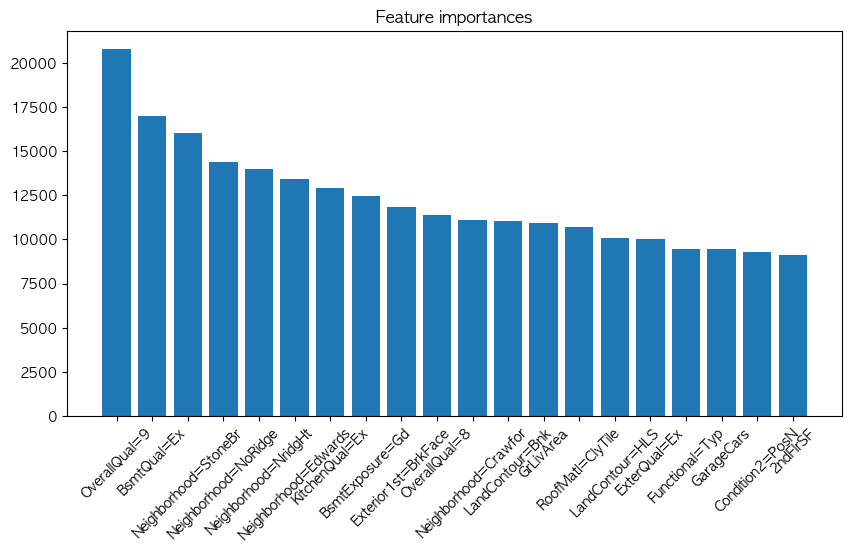

In [293]:
num = 20

plt.figure(figsize=(10, 5))
plt.title('Feature importances')
plt.bar(range(num), importance[:num])
plt.xticks(range(num), columns[:num], rotation=45)
plt.show()